# Project 1: Analysis and Forecasting of NYC Taxi Rides
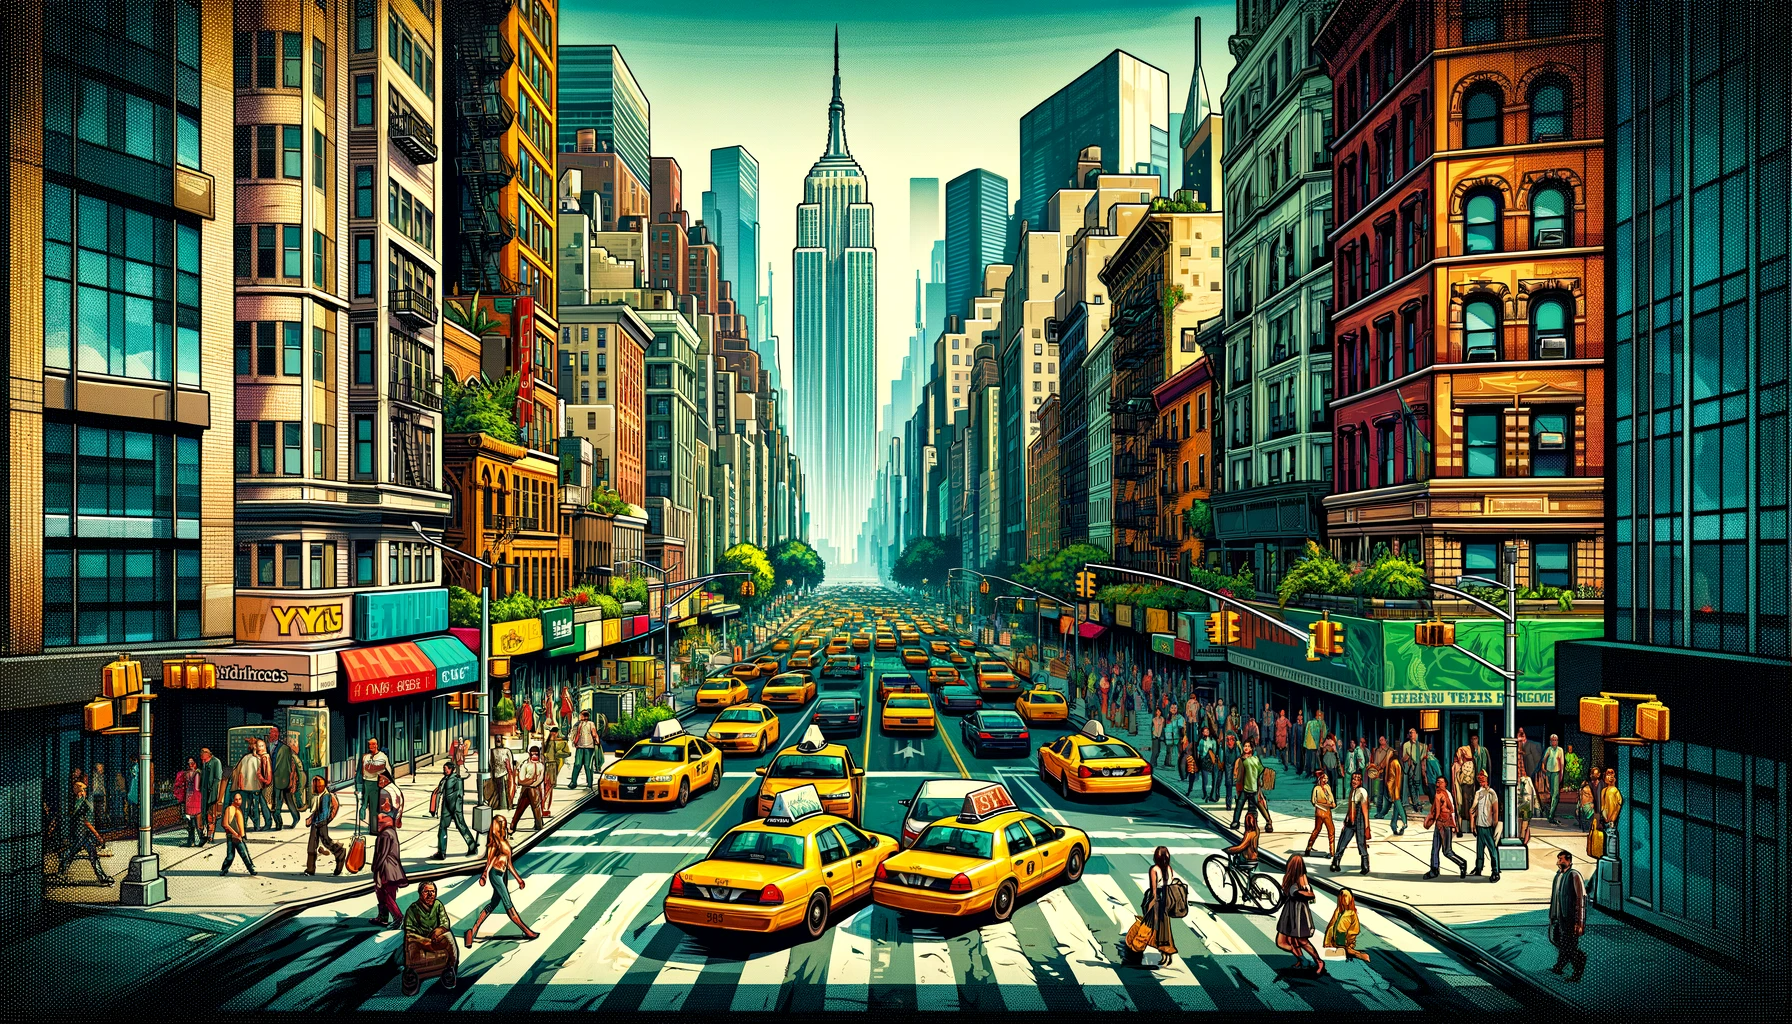

In [17]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

# Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [18]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [19]:
df_yellow.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         21.95                   2.5          0.0  
1                    0.3         13.30                   0.0          0.0  
2                    0.3         10.56                   0.0          0.0  
3                    0.3         11.80                   2.5          0.0  
4                    0.3         30.30                   2.5          0.0

In [20]:
df_green.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          3.5   0.50      0.5        0.00           0.0      None   
1          9.5   0.50      0.5        0.00           0.0      None   
2         14.5   3.25      0.5        4.60           0.0      None   
3          8.0   0.50      0.5        0.00           0.0      None   
4         22.0   0.50      0.5        5.21           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          4.80           2.0        1.0   
1                    0.3         10.80           2.0        1.0   
2                    0.3         23.15           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                    0.3         31.26           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

# Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.


## Analysis

First, we need to check for any unusually high values or outliers in the **trip_distance** column. We will examine the summary statistics and plot the distribution again after filtering out these outliers.

In [21]:
df_yellow['trip_distance'].describe()

count    5.443362e+06
mean     5.635142e+00
std      6.015312e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.770000e+00
75%      3.170000e+00
max      3.487985e+05
Name: trip_distance, dtype: float64

In [22]:
df_green['trip_distance'].describe()

count    131894.000000
mean         87.438288
std        3140.742958
min           0.000000
25%           1.100000
50%           1.910000
75%           3.530000
max      259777.570000
Name: trip_distance, dtype: float64

The summary statistics indicate that the trip_distance column for the yellow taxies has a maximum value of 348,798.5 miles and for the green a maximum value of 259,777.5 miles, which is clearly both outliers. For the yellow taxies as an example, the median (50%) value is 1.77 miles, and the 75th percentile (75%) is 3.17 miles. These statistics suggest that most trips are reasonably short.

We'll filter out the extreme outliers by limiting the trip distances to a maximum of 500 miles. This should help us get a more realistic distribution.

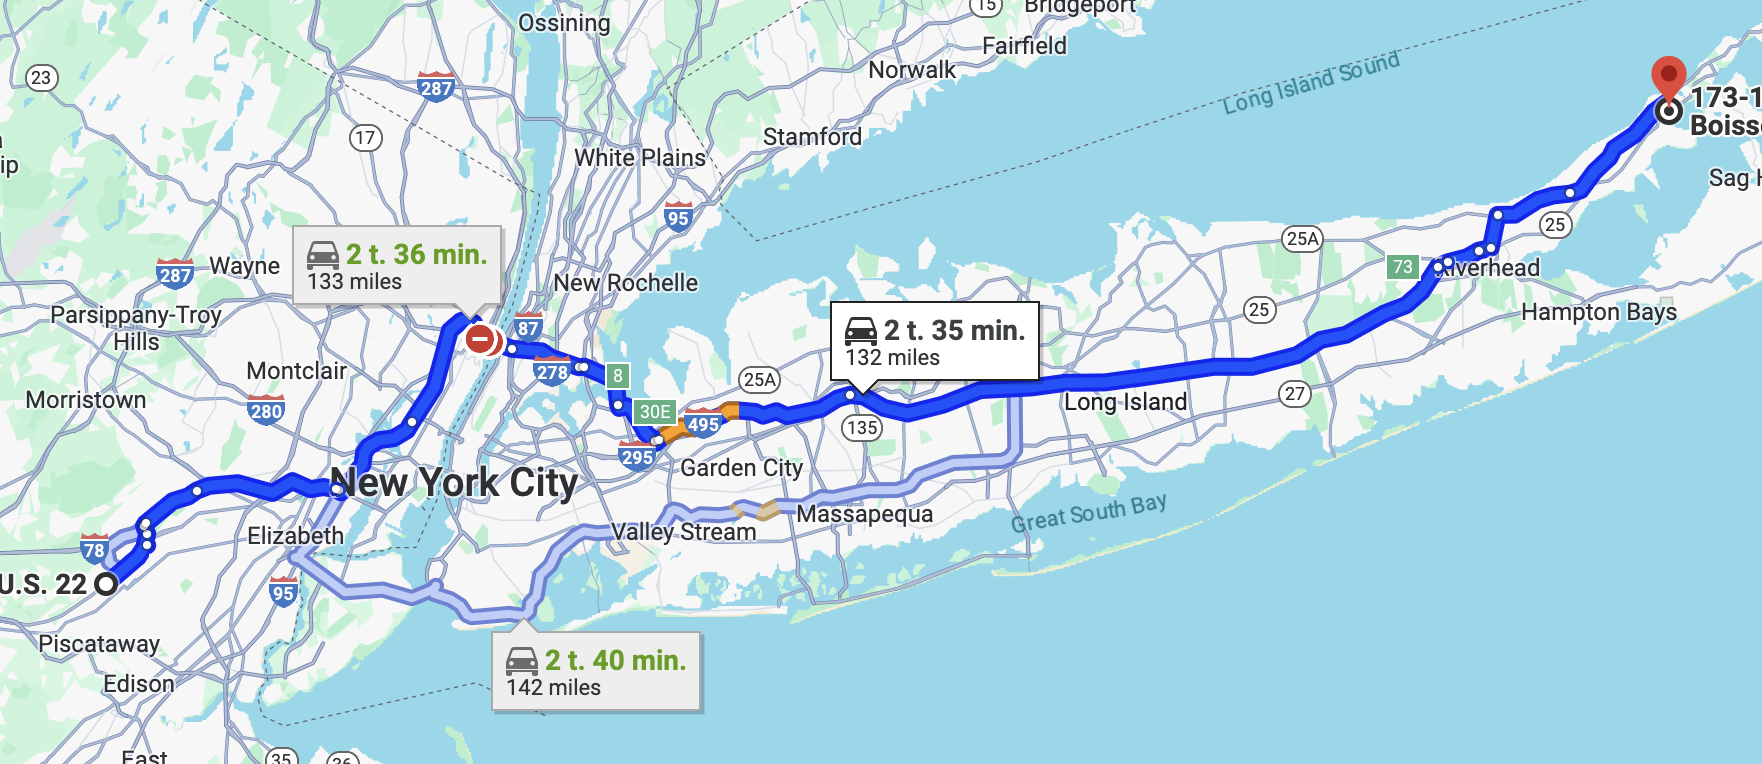


### Cleaning and Filtering the Trip Distance Data

To remove outliers and obtain a more accurate distribution, we filter out trip distances greater than 500 miles, as such values are unrealistic for taxi trips within NYC.



In [23]:
# Filter out unreasonable trip distances (e.g., > 500 miles)
df_yellow_filtered = df_yellow[df_yellow['trip_distance'] <= 500]
df_green_filtered = df_green[(df_green['trip_distance'] <= 500)]

In [24]:

# Summary statistics for the filtered trip_distance
df_yellow_filtered['trip_distance'].describe()

count    5.443202e+06
mean     3.106407e+00
std      4.046375e+00
min      0.000000e+00
25%      1.060000e+00
50%      1.770000e+00
75%      3.170000e+00
max      4.708000e+02
Name: trip_distance, dtype: float64

In [25]:
df_green_filtered['trip_distance'].describe()

count    131753.000000
mean          2.849477
std           3.107618
min           0.000000
25%           1.100000
50%           1.900000
75%           3.520000
max         123.710000
Name: trip_distance, dtype: float64

### Plotting the Distribution of Trip Distances (Filtered Data)

After filtering out the outliers, we plot the distribution of trip distances get a clearer understanding of the data.

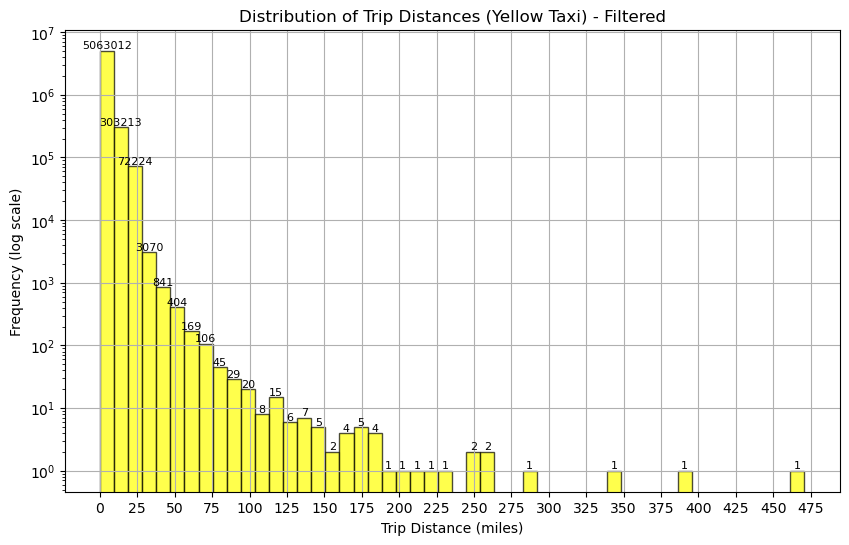

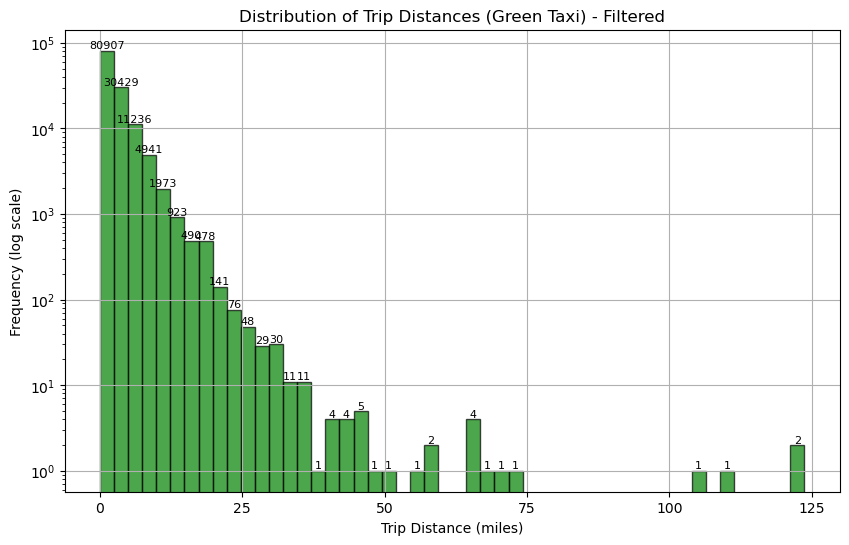

In [26]:
import matplotlib.pyplot as plt

# Distribution of trip distances for yellow taxis
plt.figure(figsize=(10, 6))
n_yellow, bins_yellow, patches_yellow = plt.hist(df_yellow_filtered['trip_distance'], bins=50, edgecolor='black', alpha=0.7, color='yellow')
plt.yscale('log')
plt.title('Distribution of Trip Distances (Yellow Taxi) - Filtered')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)

# Add text annotations for yellow taxis
for count, bin in zip(n_yellow, bins_yellow[:-1]):
    if count > 0:  # Add text annotation only for bars with count greater than 0
        plt.text(bin + (bins_yellow[1] - bins_yellow[0]) / 2, count, int(count), ha='center', va='bottom', fontsize=8)

# Set x-ticks at intervals of 25 for yellow taxis
plt.xticks(range(0, int(max(df_yellow_filtered['trip_distance'])) + 25, 25))

plt.show()

# Distribution of trip distances for green taxis
plt.figure(figsize=(10, 6))
n_green, bins_green, patches_green = plt.hist(df_green_filtered['trip_distance'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.yscale('log')
plt.title('Distribution of Trip Distances (Green Taxi) - Filtered')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)

# Add text annotations for green taxis
for count, bin in zip(n_green, bins_green[:-1]):
    if count > 0:  # Add text annotation only for bars with count greater than 0
        plt.text(bin + (bins_green[1] - bins_green[0]) / 2, count, int(count), ha='center', va='bottom', fontsize=8)

# Set x-ticks at intervals of 25 for green taxis
plt.xticks(range(0, int(max(df_green_filtered['trip_distance'])) + 25, 25))

plt.show()


### Observations from the Distribution of Trip Distances
The histogram of trip distances, plotted on a logarithmic scale, reveals several key insights about the yellow and green taxi rides in NYC. 

First we see that it has a skewed distribution. The distribution of trip distances is highly skewed to the right. Most trips are short, with a significant number of trips falling within the 0 to 5 miles range. For the yellow its 5 million trips and for the green about 80 thousand. This is expected as taxis are commonly used for short-distance travel within the city or Manhatten and that yellow taxies are more popular.

While most trips are short, there are some long-distance trips extending beyond 25 miles. These are relatively rare, as indicated by the lower frequencies on the log scale. This could include trips to and from airports or between distant boroughs.

There are a few trips with distances exceeding 200 miles for the yellow taxies. Although these are rare, they do exist. We should consider whether these long trips are valid entries or if they might be due to data entry errors or anomalies. For the green taxies, there are no trips between 125 - 500 miles.

The use of a logarithmic scale helps to clearly see the distribution of less frequent long-distance trips. Without the log scale, these would appear almost invisible in the plot, which is why we choose this type.

Data Filtering: The initial filtering to remove trips greater than 500 miles was a reasonable step. However, the plot shows that even trips up to 500 miles exist.

### Distribution of Fare Amounts

To understand the range and common values for fare amounts, we plot the distribution of fare amounts for yellow and green taxi rides. This helps identify typical fare costs and outliers.


In [27]:
# Summary statistics for fare_amount
df_yellow['fare_amount'].describe()

count    5.443362e+06
mean     1.304498e+01
std      1.723407e+02
min     -6.000000e+02
25%      6.500000e+00
50%      9.500000e+00
75%      1.400000e+01
max      4.010923e+05
Name: fare_amount, dtype: float64

In [28]:
# Summary statistics for fare_amount
df_green['fare_amount'].describe()

count    131894.000000
mean         13.996414
std          12.182841
min        -165.000000
25%           7.000000
50%          10.500000
75%          17.000000
max         604.500000
Name: fare_amount, dtype: float64

Based on the summary statistics for fare_amount, it is clear that there are some outliers and possibly incorrect values, such as negative fares and excessively high values up to 401.000 USD. Let's filter out these unrealistic values to get a more accurate distribution.

To remove outliers and obtain a more accurate distribution, we filter out fare amounts that are negative or greater than 1000 USD, as such values are unrealistic for taxi fares within NYC.

In [29]:
# Filter out unreasonable fare amounts (e.g., negative values and > 1000 USD)
df_yellow_filtered = df_yellow[(df_yellow['trip_distance'] <= 500) & 
                               (df_yellow['fare_amount'] > 0) & 
                               (df_yellow['fare_amount'] <= 1000)]

# Summary statistics for the filtered fare_amount
df_yellow_filtered['fare_amount'].describe()

count    5.412604e+06
mean     1.311046e+01
std      1.202412e+01
min      1.000000e-02
25%      6.500000e+00
50%      9.500000e+00
75%      1.450000e+01
max      7.200000e+02
Name: fare_amount, dtype: float64

In [30]:
df_green_filtered = df_green[(df_green['trip_distance'] <= 500) & 
                             (df_green['fare_amount'] > 0) & 
                             (df_green['fare_amount'] <= 1000)]

df_green_filtered['fare_amount'].describe()

count    131106.000000
mean         14.082423
std          12.099282
min           0.010000
25%           7.500000
50%          10.500000
75%          17.000000
max         604.500000
Name: fare_amount, dtype: float64

The summary statistics for the filtered fare_amount data indicate that has a range from 0.01 USD to 1000 USD, with the following key statistics:

* **Mean**: 13.11 USD (yellow) and 14.08 USD (green)
* **Median** (50%): 9.50 USD (yellow) and 10.50 USD (green)
* **Standard Deviation**: 12.02 USD (yellow) and 12.10 USD (green)
* **25th Percentile**: 6.50 USD (yellow) and 7.50 USD (green)
* **75th Percentile**: 14.50 USD (yellow) and 17.00 USD (green)

These statistics are more aligned with the expected fare distribution for NYC taxis. The mean and median fares are slightly higher for green taxis compared to yellow taxis. Both distributions show a significant range in fare amounts, with most fares falling within a reasonable range, though there are some high-value trips present in both datasets.

### Plotting the Distribution of Fare Amounts

After filtering out the outliers, we plot the distribution of fare amounts to get a clearer understanding of the data.

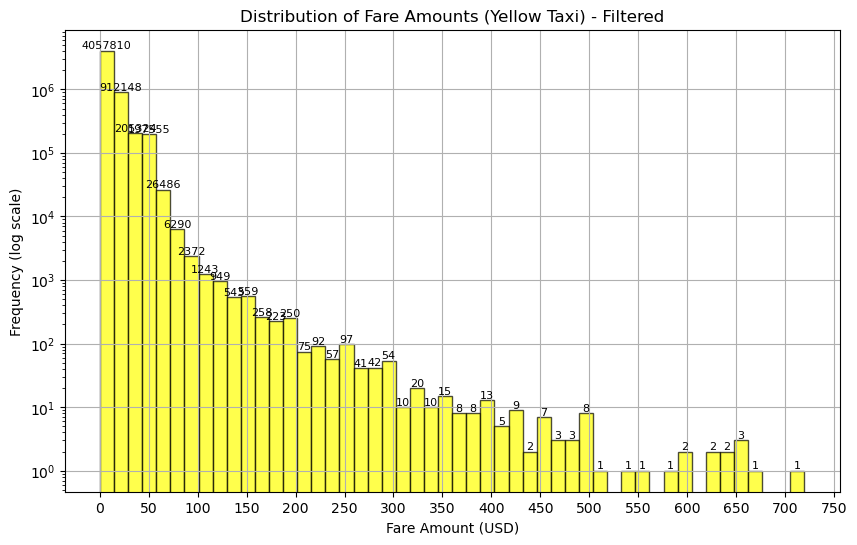

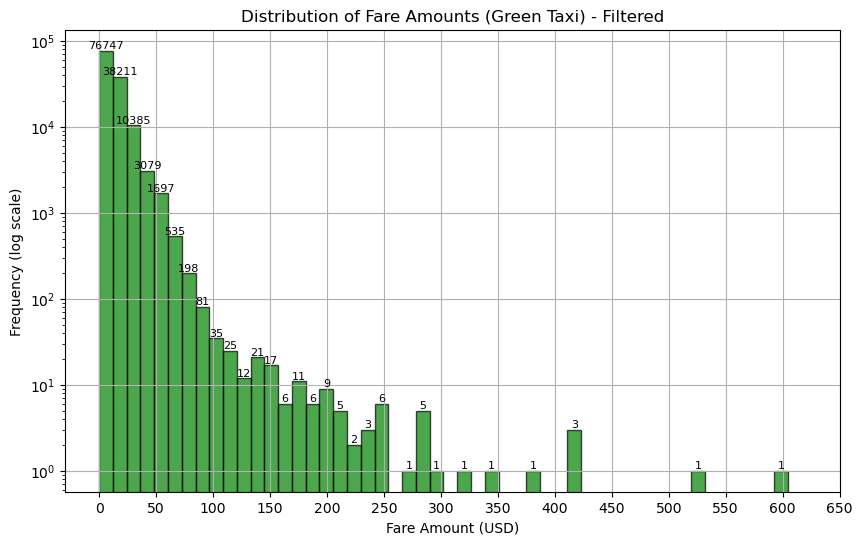

In [31]:
import matplotlib.pyplot as plt

# Distribution of fare amounts after filtering for yellow taxis
plt.figure(figsize=(10, 6))
n_yellow, bins_yellow, patches_yellow = plt.hist(df_yellow_filtered['fare_amount'], bins=50, edgecolor='black', alpha=0.7, color='yellow')
plt.yscale('log')
plt.title('Distribution of Fare Amounts (Yellow Taxi) - Filtered')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)

# Add text annotations for yellow taxis
for count, bin in zip(n_yellow, bins_yellow[:-1]):
    if count > 0:  # Add text annotation only for bars with count greater than 0
        plt.text(bin + (bins_yellow[1] - bins_yellow[0]) / 2, count, int(count), ha='center', va='bottom', fontsize=8)

# Set x-ticks at intervals of 10 for yellow taxis
plt.xticks(range(0, int(max(df_yellow_filtered['fare_amount'])) + 50, 50))

plt.show()

# Distribution of fare amounts after filtering for green taxis
plt.figure(figsize=(10, 6))
n_green, bins_green, patches_green = plt.hist(df_green_filtered['fare_amount'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.yscale('log')
plt.title('Distribution of Fare Amounts (Green Taxi) - Filtered')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)

# Add text annotations for green taxis
for count, bin in zip(n_green, bins_green[:-1]):
    if count > 0:  # Add text annotation only for bars with count greater than 0
        plt.text(bin + (bins_green[1] - bins_green[0]) / 2, count, int(count), ha='center', va='bottom', fontsize=8)

# Set x-ticks at intervals of 10 for green taxis
plt.xticks(range(0, int(max(df_green_filtered['fare_amount'])) + 50, 50))

plt.show()


### Observations from the Distribution of Fare Amounts

The histogram of fare amounts reveals several key insights about the yellow taxi rides in NYC:

The distribution shows that most taxi fares are within the range of 5 to 25 USD, with the highest frequencies observed around 0-10 USD. This aligns with the expected cost for short-distance taxi rides within the city.

Similar to trip distances, the fare amounts also show a skewed distribution, with a long tail extending towards higher fares. This is expected as longer trips or trips with additional charges (e.g., tolls, tips) would result in higher fares.

By filtering out negative values and excessively high fares (greater than 500 USD), we have removed unrealistic entries, providing a clearer picture of typical fare amounts.

### Distribution of Passenger Counts

With these observations, we can proceed to the next part of our analysis. Let's analyze the distribution of passenger counts to understand occupancy rates for both yellow and green taxis.

In [32]:
# Summary statistics for passenger_count
df_yellow_filtered['passenger_count'].describe()

count    5.239635e+06
mean     1.391341e+00
std      9.846560e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

The summary statistics for passenger_count (Yellow Taxi) show the following key points:

* Count: 5,239,642 entries
* Mean: 1.39 passengers
* Standard Deviation: 0.98 passengers
* Minimum: 0 passengers (which might need investigation, like why are trips happening with 0 passengers?)
* 25th Percentile: 1 passenger
* Median (50%): 1 passenger
* 75th Percentile: 1 passenger

In [33]:
df_green_filtered['passenger_count'].describe()

count    117543.000000
mean          1.263410
std           0.889031
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

Here the statistics don't need a summary. We can see that they are very similar. 

#### Observations:
For both yellow and green taxis, the majority of trips have a single passenger, as indicated by the 25th, 50th, and 75th percentiles all being 1.
There are trips recorded with 0 passengers, which might be due to data entry errors or special cases (e.g., no-shows, errors).
The maximum recorded value might indicate shared rides or data entry errors.

### Investigating Trips with 0 Passengers
First, we will investigate trips with 0 passengers to understand if these should be filtered out or if there is a reason behind them.

In [34]:
# Count the number of trips with 0 passengers
zero_passenger_trips_yellow = df_yellow[df_yellow['passenger_count'] == 0]
zero_passenger_count_yellow = zero_passenger_trips_yellow.shape[0]
zero_passenger_count_yellow

114266

In [35]:
# Count the number of trips with 0 passengers
zero_passenger_trips_green = df_green[df_green['passenger_count'] == 0]
zero_passenger_count_green = zero_passenger_trips_green.shape[0]
zero_passenger_count_green

472

For the yellow taxies, there are 114,266 trips with 0 passengers, which is a significant number. After some discussion in the group, we thought that the reason for this number might be due to canceled rides of people not wanting to take a ride after all. If we can find a corellation between the 0 passenger amount with the distance of the ride, and the dollar amount is also 0, then this might mean that a ride was cancelled and the taxi never drove. 


**Investigating the Correlation between Zero Passengers, Zero Fare Amount, and Zero Distance**

To verify if trips with zero passengers also have a zero fare amount and zero trip distance, we will investigate the correlation between these attributes. This analysis will help us determine if these trips were likely canceled rides.

We will first check the summary statistics for trips with zero passengers to see if they have zero fare amounts and zero trip distances.

In [36]:
# Filter trips with zero passengers
zero_passenger_trips_yellow = df_yellow[df_yellow['passenger_count'] == 0]

# Summary statistics for zero fare amount and zero trip distance
zero_passenger_zero_fare_yellow = zero_passenger_trips_yellow[zero_passenger_trips_yellow['fare_amount'] == 0]
zero_passenger_zero_distance_yellow = zero_passenger_zero_fare_yellow[zero_passenger_zero_fare_yellow['trip_distance'] == 0]

# Count the number of trips with zero fare and zero distance among zero passenger trips
zero_passenger_zero_fare_count_yellow = zero_passenger_zero_fare_yellow.shape[0]
zero_passenger_zero_distance_count_yellow = zero_passenger_zero_distance_yellow.shape[0]

zero_passenger_zero_fare_count_yellow, zero_passenger_zero_distance_count_yellow

(98, 61)

In [37]:
# Filter trips with zero passengers
zero_passenger_trips_green = df_green[df_green['passenger_count'] == 0]

# Summary statistics for zero fare amount and zero trip distance
zero_passenger_zero_fare_green = zero_passenger_trips_green[zero_passenger_trips_green['fare_amount'] == 0]
zero_passenger_zero_distance_green = zero_passenger_zero_fare_green[zero_passenger_zero_fare_green['trip_distance'] == 0]

# Count the number of trips with zero fare and zero distance among zero passenger trips
zero_passenger_zero_fare_count_green = zero_passenger_zero_fare_green.shape[0]
zero_passenger_zero_distance_count_green = zero_passenger_zero_distance_green.shape[0]

zero_passenger_zero_fare_count_green, zero_passenger_zero_distance_count_green

(9, 5)

Since only a small subset of the zero-passenger trips meet the criteria of being zero fare and zero distance, it suggests that not all zero-passenger trips are canceled rides. Therefore it would be wise to assume that the entries with 0 passengers might be due to some other reason.

**Investigating the Dates of Zero Passenger Rides**

After doing some research, we found this article of taxies in NYC making package deliveries during the Covid-19 pandamic: 
https://abcnews.go.com/US/nyc-taxi-drivers-deliver-food-coronavirus-pandemic-program/story?id=70241165

The article discusses a program during the COVID-19 pandemic where NYC taxi drivers delivered food to those in need. This initiative, started in April 2020, aimed to provide essential deliveries while supporting taxi drivers who faced reduced passenger demand.

To check if the zero-passenger rides correspond to the pandemic food delivery program, we can extract the dates and see if these rides occurred during the relevant period.

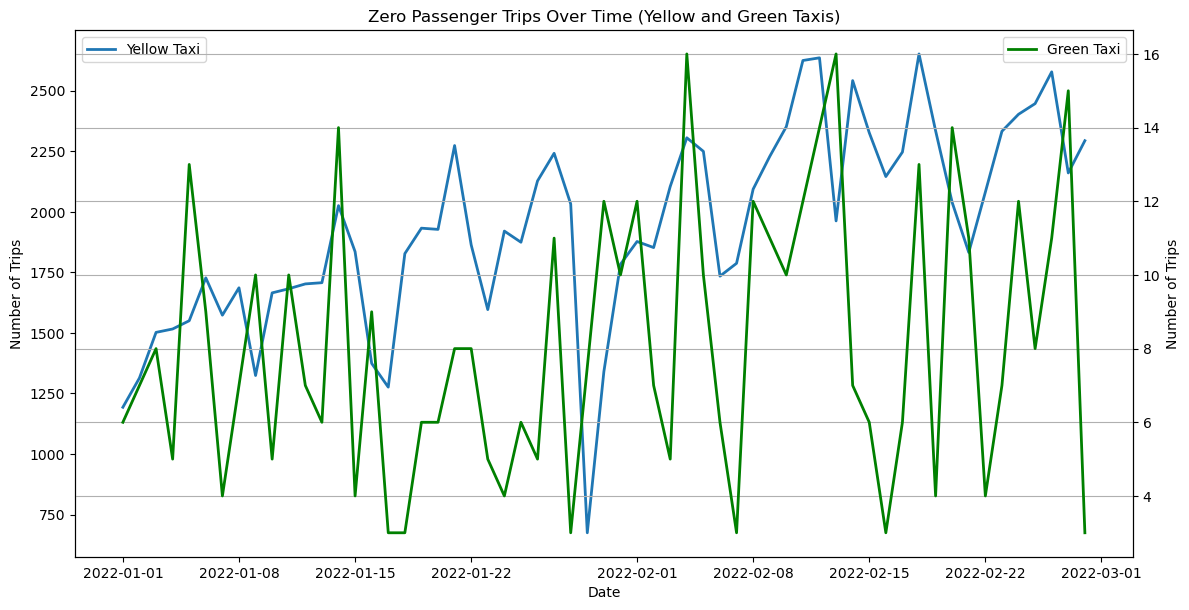

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert pickup datetime to pandas datetime
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Filter trips with zero passengers
zero_passenger_trips_yellow = df_yellow[df_yellow['passenger_count'] == 0].copy()
zero_passenger_trips_green = df_green[df_green['passenger_count'] == 0].copy()

# Extract the dates of these trips
zero_passenger_trips_yellow.loc[:, 'date'] = zero_passenger_trips_yellow['tpep_pickup_datetime'].dt.date
zero_passenger_trips_green.loc[:, 'date'] = zero_passenger_trips_green['lpep_pickup_datetime'].dt.date

# Count the number of zero passenger trips by date
zero_passenger_trip_counts_yellow = zero_passenger_trips_yellow['date'].value_counts().sort_index()
zero_passenger_trip_counts_green = zero_passenger_trips_green['date'].value_counts().sort_index()

# Plot the distribution of zero passenger trips over time with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Trips')
ax1.plot(zero_passenger_trip_counts_yellow.index, zero_passenger_trip_counts_yellow.values, label='Yellow Taxi', linewidth=2)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Number of Trips')
ax2.plot(zero_passenger_trip_counts_green.index, zero_passenger_trip_counts_green.values, label='Green Taxi', color='green', linewidth=2)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Zero Passenger Trips Over Time (Yellow and Green Taxis)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()


### Observation

The data does not correlate with the pandemic food delivery program, which began in April 2020. Therefore, the zero-passenger trips in 2022 are unlikely related to that program. In fact, we can see that the number of trips with 0 passengers are increasing for the yellow and consistent for the green.

Since the zero-passenger trips do not correlate with the pandemic food delivery program, we should proceed with the rest of our analysis, considering these entries as potential anomalies but not filtering them out just yet.

Let's further examine the distribution of passenger counts, considering the filtered data to ensure accuracy.


### Distribution of Passenger Counts

Let's plot the distribution of passenger counts for both yellow and green taxis, including trips with 0 passengers.

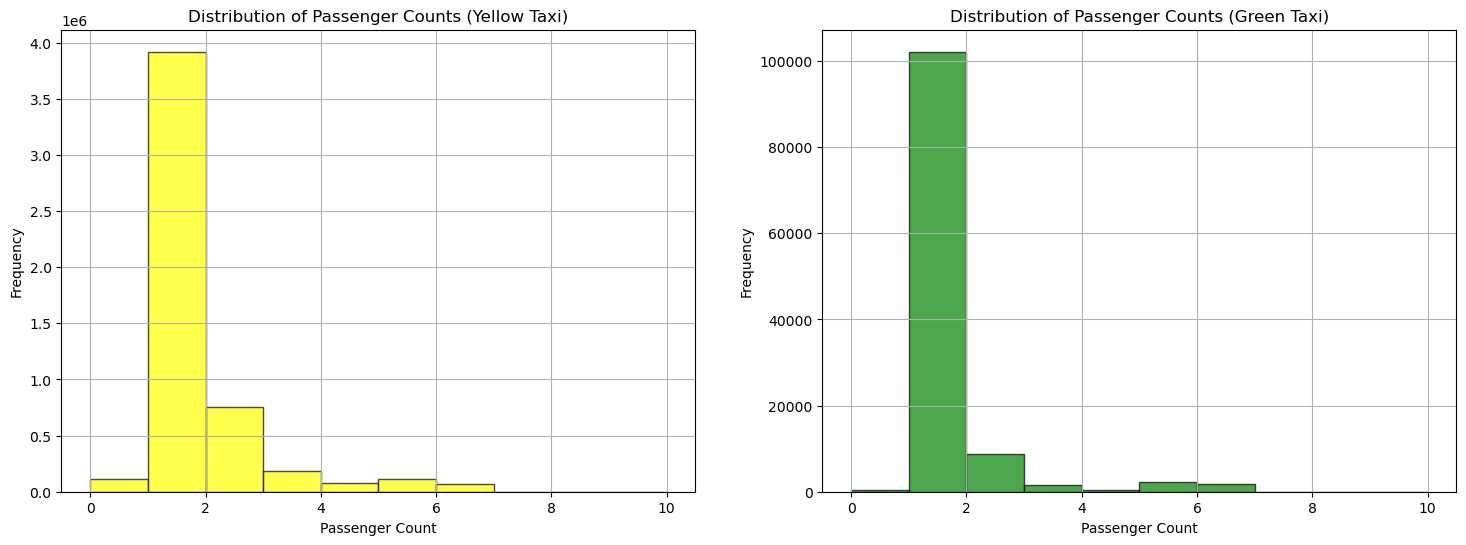

In [39]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Yellow Taxi
axs[0].hist(df_yellow_filtered['passenger_count'], bins=range(11), edgecolor='black', alpha=0.7, color='yellow')
axs[0].set_title('Distribution of Passenger Counts (Yellow Taxi)')
axs[0].set_xlabel('Passenger Count')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Green Taxi
axs[1].hist(df_green_filtered['passenger_count'], bins=range(11), edgecolor='black', alpha=0.7, color='green')
axs[1].set_title('Distribution of Passenger Counts (Green Taxi)')
axs[1].set_xlabel('Passenger Count')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.show()


As we can see for both yellow and green taxis, the most common passenger count is 1, followed by 2.
Trips with 0 passengers need further investigation to understand the reasons behind these entries.
The distribution pattern is quite similar for both yellow and green taxis, with a steep decline in frequency as the passenger count increases beyond 2.


## Relationships

### Relationship Between Trip Distance and Fare Amount

To explore the relationship between trip distance and fare amount using the filtered data, we create a scatter plot. This helps us see if longer trips generally result in higher fares and identify any outliers or unusual patterns.


#### Yellow Taxies

Since there is a very wide range of trip distances, it might be causing the plot to appear a bit cluttered. So we can zoom in on the more relevant range of trip distances to get a clearer view of the data.

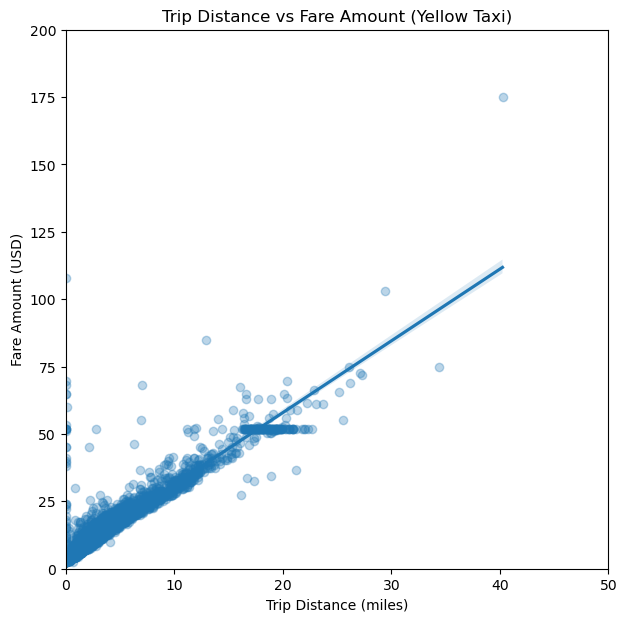

In [40]:
from src.utils import create_scatterplot

# Sample the data to speed up the plotting process
df_yellow_sampled = df_yellow_filtered.sample(frac=0.001, random_state=1)

# Create scatter plot for yellow taxis
create_scatterplot(
    df=df_yellow_sampled,
    x_col='trip_distance',
    y_col='fare_amount',
    title='Trip Distance vs Fare Amount (Yellow Taxi)',
    xlabel='Trip Distance (miles)',
    ylabel='Fare Amount (USD)',
    xlim=(0, 50),
    ylim=(0, 200)
)


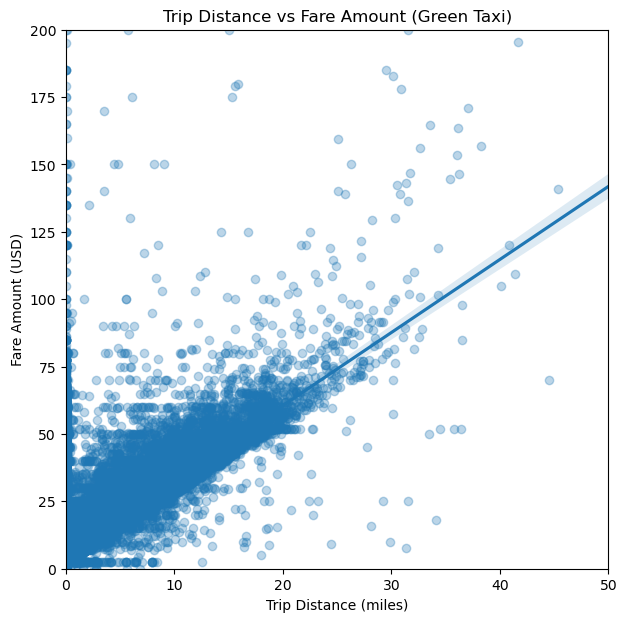

In [41]:
from src.utils import create_scatterplot

# Create a scatter plot for green taxis
create_scatterplot(
    df=df_green_filtered,
    x_col='trip_distance',
    y_col='fare_amount',
    title='Trip Distance vs Fare Amount (Green Taxi)',
    xlabel='Trip Distance (miles)',
    ylabel='Fare Amount (USD)',
    xlim=(0, 50),
    ylim=(0, 200)
)

#### Observations from the Scatter Plot

* **Positive Linear Relationship**: There is a clear positive linear relationship between trip distance and fare amount. Longer trips generally result in higher fares, which aligns with expectations.
* **Fare Structure**: The fare amounts show a step-like increase with distance, likely reflecting the fare structure of NYC taxis, which includes initial base fares and additional charges per unit distance.
* **Outliers**: While most data points follow the expected trend, there are still some outliers with higher fares for shorter distances and vice versa, which might be due to factors like traffic, tolls, or additional charges.

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [42]:
df_zones.head(5)

Shape_Leng  Shape_Area                     zone  LocationID        borough  \
0    0.116357    0.000782           Newark Airport           1            EWR   
1    0.433470    0.004866              Jamaica Bay           2         Queens   
2    0.084341    0.000314  Allerton/Pelham Gardens           3          Bronx   
3    0.043567    0.000112            Alphabet City           4      Manhattan   
4    0.092146    0.000498            Arden Heights           5  Staten Island   

         lat        lng  
0  40.689516 -74.176786  
1  40.625724 -73.826126  
2  40.865888 -73.849479  
3  40.724152 -73.977023  
4  40.550340 -74.189930

#### Preparation & Installation

We start by ensuring that Kepler.gl is installed and configured correctly on our notebook.


In [43]:
# %pip install keplergl

#### Map Location IDs to Coordinates

Next, we map the `PULocationID` and `DOLocationID` in the taxi data to their corresponding latitude and longitude values using `df_zones`.


In [44]:
import pandas as pd

# Rename columns for consistency in zones data
df_zones.rename(columns={'LocationID': 'LocationID', 'lat': 'latitude', 'lng': 'longitude'}, inplace=True)

# Sample the data to reduce the size before merging
df_yellow_sampled = df_yellow_filtered.sample(frac=0.001, random_state=1)
df_green_sampled = df_green_filtered.sample(frac=0.001, random_state=1)

# Merge the pickup coordinates
yellow_pickups = df_yellow_sampled.merge(df_zones, left_on='PULocationID', right_on='LocationID')[['tpep_pickup_datetime', 'longitude', 'latitude', 'PULocationID']]
green_pickups = df_green_sampled.merge(df_zones, left_on='PULocationID', right_on='LocationID')[['lpep_pickup_datetime', 'longitude', 'latitude', 'PULocationID']]

# Merge the dropoff coordinates
yellow_dropoffs = df_yellow_sampled.merge(df_zones, left_on='DOLocationID', right_on='LocationID')[['tpep_dropoff_datetime', 'longitude', 'latitude', 'DOLocationID']]
green_dropoffs = df_green_sampled.merge(df_zones, left_on='DOLocationID', right_on='LocationID')[['lpep_dropoff_datetime', 'longitude', 'latitude', 'DOLocationID']]

# Rename columns for consistency
yellow_pickups.columns = ['datetime', 'longitude', 'latitude', 'LocationID']
green_pickups.columns = ['datetime', 'longitude', 'latitude', 'LocationID']
yellow_dropoffs.columns = ['datetime', 'longitude', 'latitude', 'LocationID']
green_dropoffs.columns = ['datetime', 'longitude', 'latitude', 'LocationID']

# Add a column to distinguish between pickups and dropoffs
yellow_pickups['type'] = 'pickup'
yellow_dropoffs['type'] = 'dropoff'
green_pickups['type'] = 'pickup'
green_dropoffs['type'] = 'dropoff'

# Combine data into a single DataFrame
yellow_coords = pd.concat([yellow_pickups, yellow_dropoffs], axis=0)
green_coords = pd.concat([green_pickups, green_dropoffs], axis=0)

yellow_coords['color'] = 'yellow'
green_coords['color'] = 'green'

# Combine yellow and green coordinates into one DataFrame
all_coords = pd.concat([yellow_coords, green_coords], axis=0)

In [45]:
yellow_coords

datetime  longitude   latitude  LocationID     type   color
0    2022-01-08 11:15:40 -73.984176  40.759845         230   pickup  yellow
1    2022-02-03 15:54:27 -73.984176  40.759845         230   pickup  yellow
2    2022-01-15 22:56:31 -73.984176  40.759845         230   pickup  yellow
3    2022-02-10 07:19:18 -73.984176  40.759845         230   pickup  yellow
4    2022-02-22 17:01:11 -73.984176  40.759845         230   pickup  yellow
...                  ...        ...        ...         ...      ...     ...
5354 2022-01-23 13:32:26 -73.776084  40.596056         117  dropoff  yellow
5355 2022-01-07 18:42:12 -73.844070  40.781988          53  dropoff  yellow
5356 2022-02-03 12:56:55 -73.965198  40.600205         123  dropoff  yellow
5357 2022-02-21 18:03:29 -74.009960  40.653618         228  dropoff  yellow
5358 2022-02-09 18:24:15 -73.808881  40.768944         171  dropoff  yellow

[10705 rows x 6 columns]

In [46]:
green_coords

datetime  longitude   latitude  LocationID     type  color
0   2022-02-12 20:36:00 -73.986459  40.685615          25   pickup  green
1   2022-02-19 14:41:33 -73.986459  40.685615          25   pickup  green
2   2022-02-01 08:40:00 -73.986459  40.685615          25   pickup  green
3   2022-01-30 18:28:44 -73.848220  40.723465          95   pickup  green
4   2022-01-22 12:21:14 -73.848220  40.723465          95   pickup  green
..                  ...        ...        ...         ...      ...    ...
123 2022-02-01 09:02:00 -74.008386  40.735248         158  dropoff  green
124 2022-01-03 16:46:41 -73.829044  40.693000         197  dropoff  green
125 2022-01-05 01:50:14 -73.915366  40.830608          69  dropoff  green
126 2022-02-18 17:34:49 -73.925059  40.829211         247  dropoff  green
127 2022-01-23 23:17:53 -73.871010  40.834677         248  dropoff  green

[259 rows x 6 columns]

In [47]:
all_coords

datetime  longitude   latitude  LocationID     type   color
0   2022-01-08 11:15:40 -73.984176  40.759845         230   pickup  yellow
1   2022-02-03 15:54:27 -73.984176  40.759845         230   pickup  yellow
2   2022-01-15 22:56:31 -73.984176  40.759845         230   pickup  yellow
3   2022-02-10 07:19:18 -73.984176  40.759845         230   pickup  yellow
4   2022-02-22 17:01:11 -73.984176  40.759845         230   pickup  yellow
..                  ...        ...        ...         ...      ...     ...
123 2022-02-01 09:02:00 -74.008386  40.735248         158  dropoff   green
124 2022-01-03 16:46:41 -73.829044  40.693000         197  dropoff   green
125 2022-01-05 01:50:14 -73.915366  40.830608          69  dropoff   green
126 2022-02-18 17:34:49 -73.925059  40.829211         247  dropoff   green
127 2022-01-23 23:17:53 -73.871010  40.834677         248  dropoff   green

[10964 rows x 6 columns]

#### Route Data

We create the routes by pairing each pickup with its corresponding dropoff.

In [48]:
# Remove duplicates in pickup and dropoff data based on LocationID
yellow_pickups_unique = yellow_pickups.drop_duplicates(subset=['LocationID'])
yellow_dropoffs_unique = yellow_dropoffs.drop_duplicates(subset=['LocationID'])
green_pickups_unique = green_pickups.drop_duplicates(subset=['LocationID'])
green_dropoffs_unique = green_dropoffs.drop_duplicates(subset=['LocationID'])

# Function to merge pickups and dropoffs with sampled data
def merge_routes(sampled_df, pickups, dropoffs, pickup_time_col, color):
    routes = pd.merge(
        sampled_df[[pickup_time_col, 'PULocationID', 'DOLocationID']],
        pickups[['LocationID', 'longitude', 'latitude']],
        left_on='PULocationID',
        right_on='LocationID',
        how='inner'
    ).merge(
        dropoffs[['LocationID', 'longitude', 'latitude']],
        left_on='DOLocationID',
        right_on='LocationID',
        suffixes=('_pickup', '_dropoff'),
        how='inner'
    )[[pickup_time_col, 'longitude_pickup', 'latitude_pickup', 'longitude_dropoff', 'latitude_dropoff']]
    
    routes['color'] = color
    return routes

# Ensure no duplicate rows in the sampled data
df_yellow_sampled = df_yellow_sampled.drop_duplicates(subset=['tpep_pickup_datetime', 'PULocationID', 'DOLocationID'])
df_green_sampled = df_green_sampled.drop_duplicates(subset=['lpep_pickup_datetime', 'PULocationID', 'DOLocationID'])

# Process yellow routes
yellow_routes = merge_routes(
    df_yellow_sampled, 
    yellow_pickups_unique, 
    yellow_dropoffs_unique, 
    'tpep_pickup_datetime', 
    'yellow'
)

# Process green routes
green_routes = merge_routes(
    df_green_sampled, 
    green_pickups_unique, 
    green_dropoffs_unique, 
    'lpep_pickup_datetime', 
    'green'
)

# Combine routes
all_routes = pd.concat([yellow_routes, green_routes], axis=0, ignore_index=True)

# Separate the pickup and dropoff locations for yellow and green taxis
yellow_pickup_points = yellow_pickups_unique.copy()
yellow_pickup_points['color'] = 'yellow'
yellow_dropoff_points = yellow_dropoffs_unique.copy()
yellow_dropoff_points['color'] = 'yellow'

green_pickup_points = green_pickups_unique.copy()
green_pickup_points['color'] = 'green'
green_dropoff_points = green_dropoffs_unique.copy()
green_dropoff_points['color'] = 'green'

# Combine pickup and dropoff points
pickup_points = pd.concat([yellow_pickup_points, green_pickup_points], ignore_index=True)
dropoff_points = pd.concat([yellow_dropoff_points, green_dropoff_points], ignore_index=True)


In [49]:
all_routes

tpep_pickup_datetime  longitude_pickup  latitude_pickup  \
0     2022-01-08 11:15:40        -73.984176        40.759845   
1     2022-02-28 20:23:34        -73.984176        40.759845   
2     2022-01-04 13:19:23        -73.976942        40.747654   
3     2022-02-02 19:39:31        -73.976942        40.747654   
4     2022-02-05 13:14:30        -73.976942        40.747654   
...                   ...               ...              ...   
5439                  NaT        -73.903713        40.746798   
5440                  NaT        -73.945200        40.657560   
5441                  NaT        -73.800348        40.703274   
5442                  NaT        -73.829993        40.708750   
5443                  NaT        -73.917058        40.807440   

      longitude_dropoff  latitude_dropoff   color lpep_pickup_datetime  
0            -73.996778         40.742546  yellow                  NaT  
1            -73.996778         40.742546  yellow                  NaT  
2            -73.996778         40.742546  yellow                  NaT  
3            -73.996778         40.742546  yellow                  NaT  
4            -73.996778         40.742546  yellow                  NaT  
...                 ...               ...     ...                  ...  
5439         -73.959108         40.710977   green  2022-01-22 17:36:58  
5440         -73.954603         40.620959   green  2022-02-08 22:07:00  
5441         -73.799688         40.727347   green  2022-01-18 08:03:43  
5442         -73.829044         40.693000   green  2022-01-03 16:33:16  
5443         -73.871010         40.834677   green  2022-01-23 22:58:28  

[5444 rows x 7 columns]

#### Creating the Kepler.gl Maps

Using Kepler.gl, we will create interactive maps to visualize the spatial distribution of taxi rides. These maps will help us identify areas with high taxi activity.


In [50]:
import keplergl

# Create Kepler map
map_ = keplergl.KeplerGl(height=600)

# Add data to Kepler map
map_.add_data(data=pickup_points, name="Pickup Locations")
map_.add_data(data=dropoff_points, name="Dropoff Locations")
map_.add_data(data=all_routes, name="Taxi Routes")

# Configure layers in Kepler.gl
map_.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'id': 'pickup-locations',
                    'type': 'point',
                    'config': {
                        'dataId': 'Pickup Locations',
                        'label': 'Pickup Locations',
                        'color': [255, 203, 153],
                        'highlightColor': [252, 242, 26, 255],
                        'columns': {
                            'lat': 'latitude',
                            'lng': 'longitude',
                            'altitude': None
                        },
                        'isVisible': True,
                        'visConfig': {
                            'radius': 10,
                            'fixedRadius': False,
                            'opacity': 0.8,
                            'outline': False,
                            'thickness': 2,
                            'strokeColor': None,
                            'colorRange': {
                                'name': 'Uber Viz Diverging 1.5',
                                'type': 'diverging',
                                'category': 'Uber',
                                'colors': ['#00939C', '#5DBABF', '#BAE1E2', '#F7B799', '#ED6826']
                            },
                            'radiusRange': [0, 50],
                            'filled': True
                        },
                        'hidden': False,
                        'textLabel': [
                            {
                                'field': None,
                                'color': [255, 255, 255],
                                'size': 18,
                                'offset': [0, 0],
                                'anchor': 'start',
                                'alignment': 'center'
                            }
                        ]
                    },
                    'visualChannels': {
                        'colorField': None,
                        'colorScale': 'quantile',
                        'sizeField': None,
                        'sizeScale': 'linear'
                    }
                },
                {
                    'id': 'dropoff-locations',
                    'type': 'point',
                    'config': {
                        'dataId': 'Dropoff Locations',
                        'label': 'Dropoff Locations',
                        'color': [23, 184, 190],
                        'highlightColor': [252, 242, 26, 255],
                        'columns': {
                            'lat': 'latitude',
                            'lng': 'longitude',
                            'altitude': None
                        },
                        'isVisible': True,
                        'visConfig': {
                            'radius': 10,
                            'fixedRadius': False,
                            'opacity': 0.8,
                            'outline': False,
                            'thickness': 2,
                            'strokeColor': None,
                            'colorRange': {
                                'name': 'Uber Viz Diverging 1.5',
                                'type': 'diverging',
                                'category': 'Uber',
                                'colors': ['#00939C', '#5DBABF', '#BAE1E2', '#F7B799', '#ED6826']
                            },
                            'radiusRange': [0, 50],
                            'filled': True
                        },
                        'hidden': False,
                        'textLabel': [
                            {
                                'field': None,
                                'color': [255, 255, 255],
                                'size': 18,
                                'offset': [0, 0],
                                'anchor': 'start',
                                'alignment': 'center'
                            }
                        ]
                    },
                    'visualChannels': {
                        'colorField': None,
                        'colorScale': 'quantile',
                        'sizeField': None,
                        'sizeScale': 'linear'
                    }
                },
                {
                    'id': 'taxi-routes',
                    'type': 'arc',
                    'config': {
                        'dataId': 'Taxi Routes',
                        'label': 'Taxi Routes',
                        'color': [255, 153, 31],
                        'highlightColor': [252, 242, 26, 255],
                        'columns': {
                            'lat0': 'latitude_pickup',
                            'lng0': 'longitude_pickup',
                            'lat1': 'latitude_dropoff',
                            'lng1': 'longitude_dropoff'
                        },
                        'isVisible': True,
                        'visConfig': {
                            'opacity': 0.8,
                            'thickness': 2,
                            'colorRange': {
                                'name': 'Uber Viz Diverging 1.5',
                                'type': 'diverging',
                                'category': 'Uber',
                                'colors': ['#00939C', '#5DBABF', '#BAE1E2', '#F7B799', '#ED6826']
                            },
                            'sizeRange': [0, 10]
                        },
                        'hidden': False,
                        'textLabel': [
                            {
                                'field': None,
                                'color': [255, 255, 255],
                                'size': 18,
                                'offset': [0, 0],
                                'anchor': 'start',
                                'alignment': 'center'
                            }
                        ]
                    },
                    'visualChannels': {
                        'colorField': None,
                        'colorScale': 'quantile',
                        'sizeField': None,
                        'sizeScale': 'linear'
                    }
                }
            ]
        }
    }
}

# Display the map
map_


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'id': 'pickup-locations', 'type': 'point…

**Textbook Practice**: Apply the principle "focus your audience's attention" in Chapter 4. Explain briefly how you expect your visualization captures your audience's attention.

Its important to capture the audience's attention. 

Color Coding:

Pickup Locations: The visualization uses a distinct color for pickup locations, which immediately draws the viewer's attention to where taxi rides begin. This helps in identifying hotspots for taxi demand.

Dropoff Locations: Dropoff locations are color-coded differently from pickup locations, making it easy to differentiate between the start and end points of the rides.

Taxi Routes: The routes are represented by arcs in a bright color (yellow), which stands out against the dark map background. This color contrast helps the audience focus on the paths taken by taxis.

Interactive Elements:

The interactive nature of Kepler.gl allows users to zoom in and out, explore specific areas, and interact with the layers. This interactivity keeps the audience engaged and allows them to focus on areas of interest more closely.
Layer Blending:

The blending mode set to "additive" helps in visualizing overlapping routes more effectively, highlighting areas with higher traffic and thus drawing attention to regions with significant taxi activity.

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

Let's start by preparing our data.

In [51]:
# Assuming df_yellow and df_green are the original DataFrames from which you filtered
df_yellow_filtered = df_yellow_filtered.copy()
df_green_filtered = df_green_filtered.copy()

# Convert pickup datetime to pandas datetime
df_yellow_filtered.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(df_yellow_filtered['tpep_pickup_datetime'])
df_green_filtered.loc[:, 'lpep_pickup_datetime'] = pd.to_datetime(df_green_filtered['lpep_pickup_datetime'])

# Add time-related columns
df_yellow_filtered.loc[:, 'hour'] = df_yellow_filtered['tpep_pickup_datetime'].dt.hour
df_yellow_filtered.loc[:, 'day_of_week'] = df_yellow_filtered['tpep_pickup_datetime'].dt.day_name()
df_yellow_filtered.loc[:, 'month'] = df_yellow_filtered['tpep_pickup_datetime'].dt.month_name()

df_green_filtered.loc[:, 'hour'] = df_green_filtered['lpep_pickup_datetime'].dt.hour
df_green_filtered.loc[:, 'day_of_week'] = df_green_filtered['lpep_pickup_datetime'].dt.day_name()
df_green_filtered.loc[:, 'month'] = df_green_filtered['lpep_pickup_datetime'].dt.month_name()


In [52]:
df_yellow_filtered.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.65           0.0   
1             1  ...      0.5        4.00           0.0   
2             1  ...      0.5        1.76           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.3         21.95                   2.5          0.0   
1                    0.3         13.30                   0.0          0.0   
2                    0.3         10.56                   0.0          0.0   
3                    0.3         11.80                   2.5          0.0   
4                    0.3         30.30                   2.5          0.0   

   hour  day_of_week    month  
0     0     Saturday  January  
1     0     Saturday  January  
2     0     Saturday  January  
3     0     Saturday  January  
4     0     Saturday  January  

[5 rows x 22 columns]

### Number of Rides pr. day

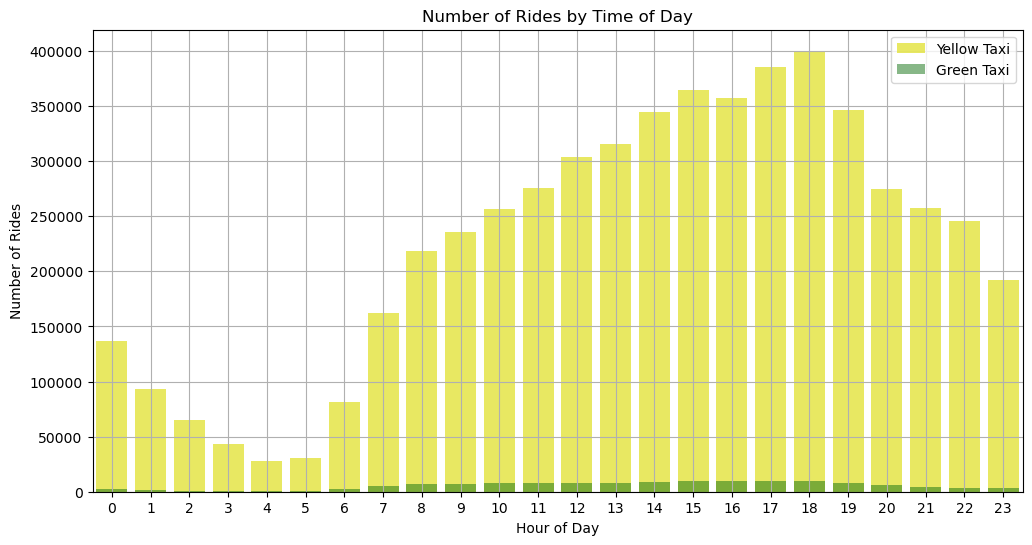

In [53]:
import seaborn as sns

# Plotting the number of rides by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df_yellow_filtered, x='hour', color='yellow', alpha=0.7, label='Yellow Taxi')
sns.countplot(data=df_green_filtered, x='hour', color='green', alpha=0.5, label='Green Taxi')
plt.title('Number of Rides by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)
plt.show()

### Number of Rides by Time of Day


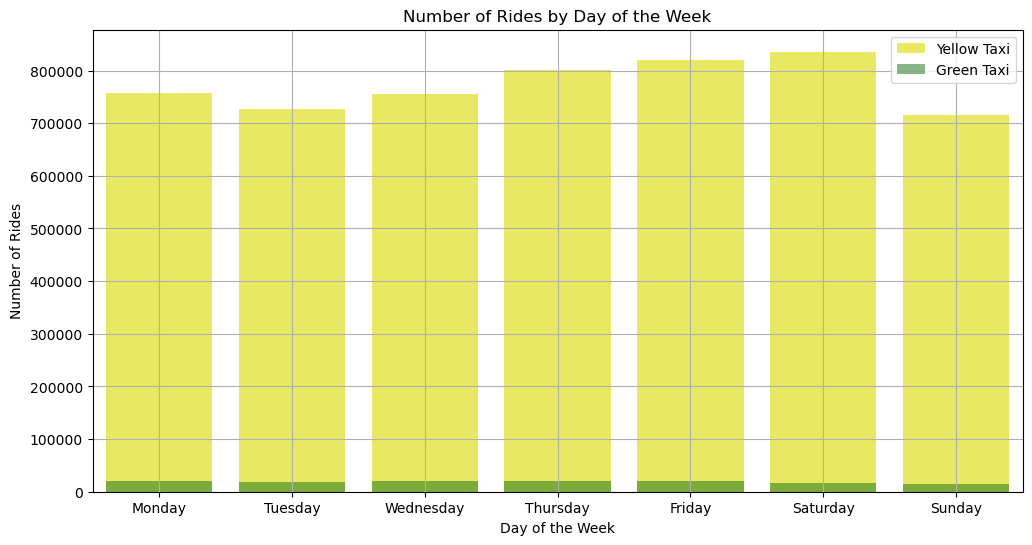

In [54]:
# Plotting the number of rides by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df_yellow_filtered, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='yellow', alpha=0.7, label='Yellow Taxi')
sns.countplot(data=df_green_filtered, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='green', alpha=0.5, label='Green Taxi')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)
plt.show()

### Number of Rides by Month


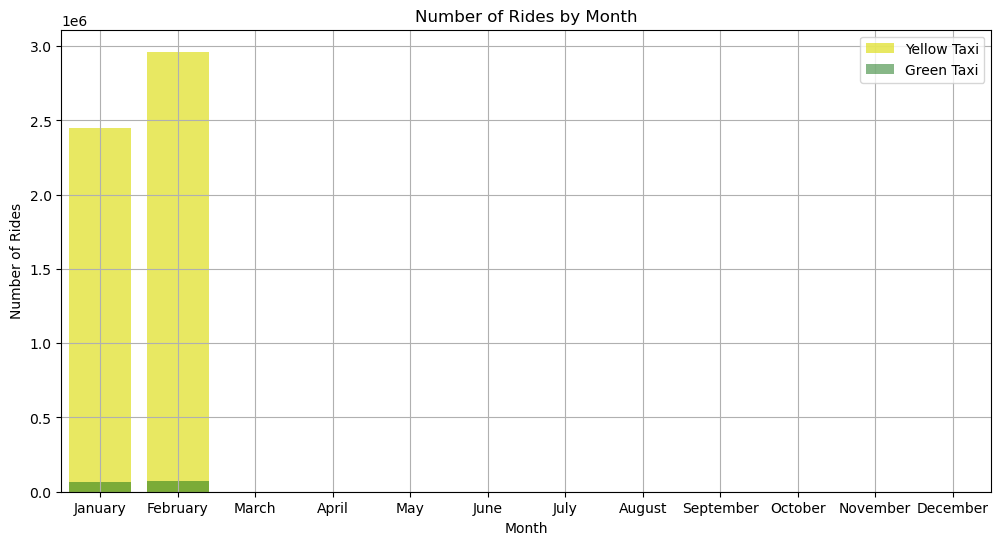

In [55]:
# Order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the number of rides by month
plt.figure(figsize=(12, 6))
sns.countplot(data=df_yellow_filtered, x='month', order=months_order, color='yellow', alpha=0.7, label='Yellow Taxi')
sns.countplot(data=df_green_filtered, x='month', order=months_order, color='green', alpha=0.5, label='Green Taxi')
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)
plt.show()

**Textbook Practice**: Use the principle "clutter is your enemy" to simplify your plots/graphs properly. Explain your motivation for each plot.

In our visualizations, we adhere to the principle "clutter is your enemy" by:

**Color Coding**: Using distinct colors for yellow and green taxis helps in differentiating between the two datasets, making the plots easier to understand.

**Grid and Labels**: Adding grid lines and clear labels enhances readability.

**Fixed Legend Location**: Positioning the legend in a fixed location (upper right) avoids clutter caused by dynamically determining the "best" location. This helps in rendering the plot efficiently and maintains clarity.

**Axis Limits and Ticks**: Setting appropriate limits on the x and y axes ensures we focus on the most relevant data, avoiding unnecessary clutter from extreme outliers.

**Title and Labels**: Clear and descriptive titles and labels make the plots self-explanatory, guiding the audience's attention to key aspects of the data.



### Relationships

Let's analyze the relationship between temporal patterns and other variables, such as trip distance and fare. We'll create plots to examine how trip distance and fare vary by time of day, day of the week, and month of the year.

#### Relationship Between Trip Distance and Time of Day
We'll start by analyzing how trip distance varies throughout the day.

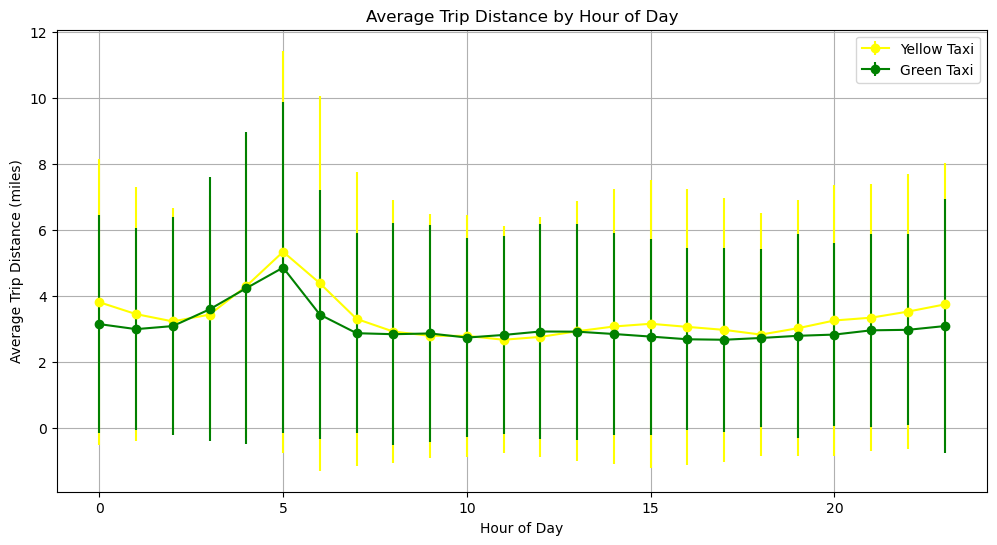

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aggregate data to calculate mean and standard deviation for trip distance by hour
yellow_hourly_stats = df_yellow_filtered.groupby('hour')['trip_distance'].agg(['mean', 'std']).reset_index()
green_hourly_stats = df_green_filtered.groupby('hour')['trip_distance'].agg(['mean', 'std']).reset_index()

# Plotting the relationship between trip distance and hour of the day for yellow taxis
plt.figure(figsize=(12, 6))
plt.errorbar(yellow_hourly_stats['hour'], yellow_hourly_stats['mean'], yerr=yellow_hourly_stats['std'], fmt='-o', color='yellow', label='Yellow Taxi')
plt.errorbar(green_hourly_stats['hour'], green_hourly_stats['mean'], yerr=green_hourly_stats['std'], fmt='-o', color='green', label='Green Taxi')
plt.title('Average Trip Distance by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Distance (miles)')
plt.grid(True)
plt.legend()
plt.show()


As we can see on the chart with the error bars representing the standard deviation, there is a high demand for longer trips in the morning around 5. This could be due having to reach the airport. The error bars represent the standard deviation of trip distances for each hour. The larger error bars in the early morning hours (around 5 AM) suggest greater variability in trip distances, indicating that while many trips are long, there are also shorter trips during this time. The early morning peak could be targeted for specific marketing or service enhancements, such as ensuring availability of taxis for airport runs or long-distance trips. The slight increase in trip distance at night suggests that there may be a demand for taxis willing to take longer trips, possibly due to reduced competition or increased demand for longer rides.



### Relationship Between Fare Amount and Time of Day
Similarly, we'll create line plots to show the average fare amount by hour of the day, with error bars representing the standard deviation.

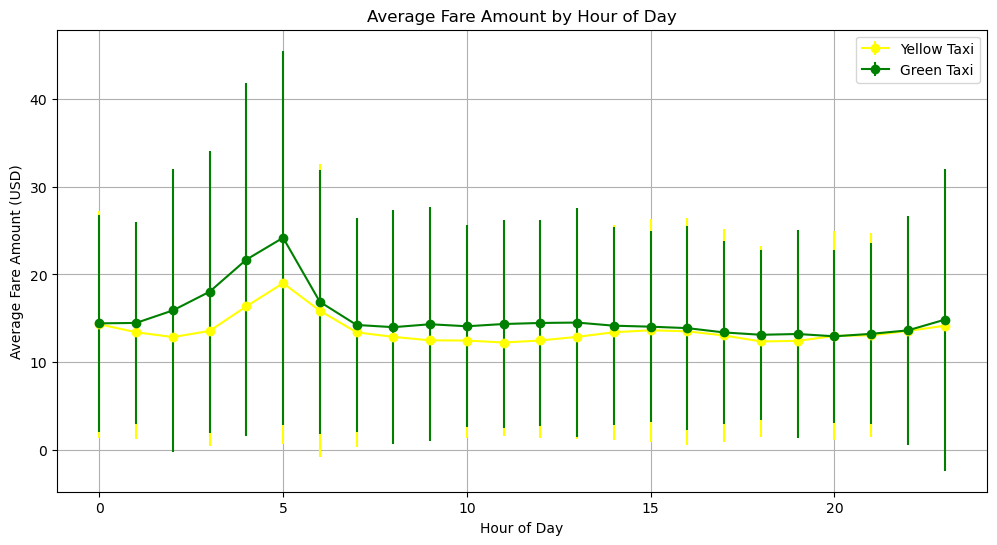

In [57]:
# Aggregate data to calculate mean and standard deviation for fare amount by hour
yellow_hourly_fare_stats = df_yellow_filtered.groupby('hour')['fare_amount'].agg(['mean', 'std']).reset_index()
green_hourly_fare_stats = df_green_filtered.groupby('hour')['fare_amount'].agg(['mean', 'std']).reset_index()

# Plotting the relationship between fare amount and hour of the day for yellow taxis
plt.figure(figsize=(12, 6))
plt.errorbar(yellow_hourly_fare_stats['hour'], yellow_hourly_fare_stats['mean'], yerr=yellow_hourly_fare_stats['std'], fmt='-o', color='yellow', label='Yellow Taxi')
plt.errorbar(green_hourly_fare_stats['hour'], green_hourly_fare_stats['mean'], yerr=green_hourly_fare_stats['std'], fmt='-o', color='green', label='Green Taxi')
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare Amount (USD)')
plt.grid(True)
plt.legend()
plt.show()

They behave as expected in accordance to the trip distances being taken which we have already proven through scatter plots. 

### Relationship Between Trip Distance and Day of the Week
Now we'll create line plots to show the average trip distance by day of the week.

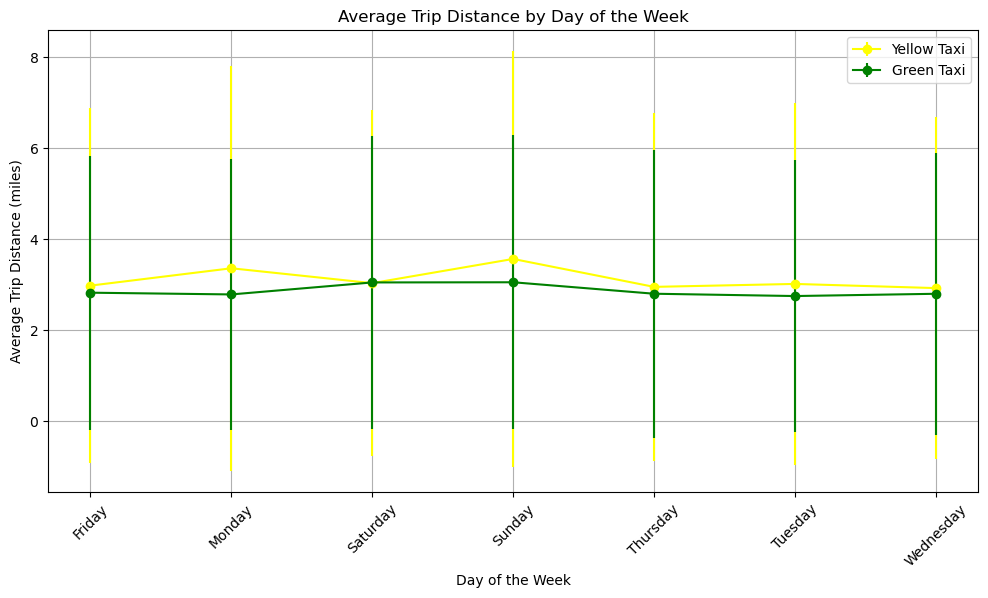

In [58]:
# Aggregate data to calculate mean and standard deviation for trip distance by day of the week
yellow_weekly_stats = df_yellow_filtered.groupby('day_of_week')['trip_distance'].agg(['mean', 'std']).reset_index()
green_weekly_stats = df_green_filtered.groupby('day_of_week')['trip_distance'].agg(['mean', 'std']).reset_index()

# Define the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the relationship between trip distance and day of the week for yellow taxis
plt.figure(figsize=(12, 6))
plt.errorbar(yellow_weekly_stats['day_of_week'], yellow_weekly_stats['mean'], yerr=yellow_weekly_stats['std'], fmt='-o', color='yellow', label='Yellow Taxi')
plt.errorbar(green_weekly_stats['day_of_week'], green_weekly_stats['mean'], yerr=green_weekly_stats['std'], fmt='-o', color='green', label='Green Taxi')
plt.title('Average Trip Distance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Modeling Details**:
Conduct parameter tuning for the forecasting model. Use cross-validation techniques appropriate for time series data, like time-based splitting.

**Evaluation Metrics**:
Specify which metrics will be used to evaluate the forecasting model, such as MAE (Mean Absolute Error), RMSE (Root Mean Square Error), or MAPE (Mean Absolute Percentage Error). Explain why these metrics are suitable (or not suitable) for the task.

**Visualization and Textbook Practice**: Plotting the forecasts against actual values to visually assess the model's performance. Creating a plot that shows how the forecast and confidence intervals change over time. You need to explain how the principles below are used for making this plot:
- "Choose an appropriate display" (Chapter 2)
- "Eliminate clutter" (Chapter 3)
- "Draw attention shere you want it" (Chapter 4)
- "Think like a designer" (Chapter 5)

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

### 1. Data Preparation

First, we need to load the yellow and green taxi data. We'll then convert the pickup datetime to the appropriate format for time-series analysis. This step is crucial because Prophet requires a specific format for date-time data.



#### Load and preprocess the data for time-series forecasting

First, we need to load the yellow and green taxi data. We'll then convert the pickup datetime to the appropriate format for time-series analysis. This step is crucial because Prophet requires a specific format for date-time data.

In [59]:
import pandas as pd
from src.utils import load_data_from_google_drive
import gc

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    print(f"Loading data for {year}-{month}...")
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)
    
    # Clear memory
    del dfy, dfg
    gc.collect()

# Concatenate the list of dataframes into a single dataframe
print("Concatenating yellow taxi data...")
df_yellow = pd.concat(df_yellow_list)
print("Concatenating green taxi data...")
df_green = pd.concat(df_green_list)

# Clear lists to free up memory
del df_yellow_list, df_green_list
gc.collect()

# Load zone data
df_zones = load_data_from_google_drive(url=zones_url)

# Convert pickup datetime to the appropriate format for time-series analysis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Filter out unreasonable trip distances (e.g., > 500 miles)
df_yellow_filtered = df_yellow[(df_yellow['trip_distance'] <= 500) & 
                               (df_yellow['fare_amount'] > 0) & 
                               (df_yellow['fare_amount'] <= 1000)]
df_green_filtered = df_green[(df_green['trip_distance'] <= 500) & 
                             (df_green['fare_amount'] > 0) & 
                             (df_green['fare_amount'] <= 1000)]

print("Data loading and preprocessing complete.")

Loading data for 2022-01...
Loading data for 2022-02...
Loading data for 2022-03...
Loading data for 2022-04...
Loading data for 2022-05...
Loading data for 2022-06...
Loading data for 2022-07...
Loading data for 2022-08...
Loading data for 2022-09...
Loading data for 2022-10...
Loading data for 2022-11...
Loading data for 2022-12...
Concatenating yellow taxi data...
Concatenating green taxi data...
Data loading and preprocessing complete.


In [60]:
df_yellow_filtered.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         21.95                   2.5          0.0  
1                    0.3         13.30                   0.0          0.0  
2                    0.3         10.56                   0.0          0.0  
3                    0.3         11.80                   2.5          0.0  
4                    0.3         30.30                   2.5          0.0

In [61]:
df_green_filtered.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          3.5   0.50      0.5        0.00           0.0      None   
1          9.5   0.50      0.5        0.00           0.0      None   
2         14.5   3.25      0.5        4.60           0.0      None   
3          8.0   0.50      0.5        0.00           0.0      None   
4         22.0   0.50      0.5        5.21           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          4.80           2.0        1.0   
1                    0.3         10.80           2.0        1.0   
2                    0.3         23.15           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                    0.3         31.26           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

#### Aggregate data to a daily level

We need to aggregate the data at a daily level since time-series forecasting typically operates on regularly spaced time intervals. We'll count the number of rides each day for both yellow and green taxis.



In [62]:
# Aggregate data to a daily level
df_yellow_filtered['date'] = df_yellow_filtered['tpep_pickup_datetime'].dt.date
df_green_filtered['date'] = df_green_filtered['lpep_pickup_datetime'].dt.date

df_yellow_daily = df_yellow_filtered.groupby('date').size().reset_index(name='rides')
df_green_daily = df_green_filtered.groupby('date').size().reset_index(name='rides')

/var/folders/nn/dc7t3p596zj3q1dng3khvt040000gn/T/ipykernel_5894/4263094027.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nn/dc7t3p596zj3q1dng3khvt040000gn/T/ipykernel_5894/4263094027.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df_yellow_daily.head()

date  rides
0  2001-01-01      5
1  2001-08-23      1
2  2002-10-21     41
3  2002-10-22     71
4  2002-10-23     61

In [64]:
df_green_daily.head()

date  rides
0  2008-12-31      1
1  2009-01-01      4
2  2021-12-31      3
3  2022-01-01   1266
4  2022-01-02   1491

#### Split the data into training and testing sets

To evaluate our model, we need to split the data into training and testing sets. The training set will include data up to a certain point, and the testing set will include data after that point. This simulates a real-world scenario where we train on historical data and predict future values.

In [65]:
# Convert split_date to a datetime.date object
split_date = pd.to_datetime('2022-11-01').date()  # Adjusted split date

# Split the yellow taxi data
train_yellow = df_yellow_daily[df_yellow_daily['date'] < split_date]
test_yellow = df_yellow_daily[df_yellow_daily['date'] >= split_date]

# Split the green taxi data
train_green = df_green_daily[df_green_daily['date'] < split_date]
test_green = df_green_daily[df_green_daily['date'] >= split_date]

# Display the sizes of the splits to verify
print(f"Yellow Taxi - Train: {train_yellow.shape}, Test: {test_yellow.shape}")
print(f"Green Taxi - Train: {train_green.shape}, Test: {test_green.shape}")


Yellow Taxi - Train: (319, 2), Test: (63, 2)
Green Taxi - Train: (307, 2), Test: (61, 2)


### 2. Modeling with Prophet

Prophet is a powerful time-series forecasting library developed by Facebook. We'll start by installing it (if not already installed in anaconda) and then importing it.

In [66]:
# %pip install prophet

We need to prepare the data in the format required by Prophet and then create and configure the model. Prophet expects the data frame to have two columns: 'ds' for the date and 'y' for the value to forecast.

In [67]:
from prophet import Prophet
import holidays

# Prepare the data for Prophet
train_yellow = train_yellow.rename(columns={'date': 'ds', 'rides': 'y'})
train_green = train_green.rename(columns={'date': 'ds', 'rides': 'y'})

# Adding holidays
us_holidays = holidays.US(years=[2022])

# Convert holidays to DataFrame
holiday_df = pd.DataFrame(list(us_holidays.items()), columns=['ds', 'holiday'])

# Initialize the Prophet models with added seasonality and holidays
model_yellow = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=holiday_df)
model_green = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=holiday_df)


#### Fit the model on the training data

We'll fit the Prophet model on the training data to learn the patterns and trends.

In [68]:
# Fit the models on the training data
model_yellow.fit(train_yellow)
model_green.fit(train_green)

# Print success message
print("Models fitted successfully.")

18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing


Models fitted successfully.


### 3. Forecasting

#### Make future data frame for predictions

We'll create a dataframe for future dates for which we want predictions. Prophet provides a helper function to generate this dataframe.

In [69]:
# Create a future dataframe for 365 days
future_yellow = model_yellow.make_future_dataframe(periods=365)
future_green = model_green.make_future_dataframe(periods=365)

# Display the future dataframe
future_yellow.tail(), future_green.tail()

(            ds
 679 2023-10-27
 680 2023-10-28
 681 2023-10-29
 682 2023-10-30
 683 2023-10-31,
             ds
 667 2023-10-27
 668 2023-10-28
 669 2023-10-29
 670 2023-10-30
 671 2023-10-31)

#### Generate forecasts using the fitted model

We'll use the fitted model to make predictions for the future dates.



In [70]:
# Make predictions
forecast_yellow = model_yellow.predict(future_yellow)
forecast_green = model_green.predict(future_green)

# Display the forecast
forecast_yellow[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(), forecast_green[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

(            ds           yhat     yhat_lower     yhat_upper
 679 2023-10-27  125884.584894  112395.777676  139497.520862
 680 2023-10-28  121349.760825  107872.764867  133732.617605
 681 2023-10-29  104049.030782   89847.707324  117025.486893
 682 2023-10-30  114356.003723  101304.947244  127125.778481
 683 2023-10-31  125741.645076  111474.414462  138081.551838,
             ds         yhat   yhat_lower   yhat_upper
 667 2023-10-27  2610.738606  2390.860729  2835.178451
 668 2023-10-28  2265.488893  2045.900095  2498.179536
 669 2023-10-29  1953.960281  1745.561518  2160.953760
 670 2023-10-30  2388.620153  2155.553003  2602.642566
 671 2023-10-31  2405.248999  2151.042278  2621.199864)

The results includes predictions and confidence intervals.


#### Plot the forecasted values

We'll plot the forecasted values to visualize the predictions. Prophet provides built-in functions for plotting.


In [71]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecasts for yellow taxis
fig_yellow = plot_plotly(model_yellow, forecast_yellow)
fig_yellow.show()

# Plot the forecasts for green taxis
fig_green = plot_plotly(model_green, forecast_green)
fig_green.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### 4. Evaluation

#### Evaluate the model performance using metrics

We'll calculate evaluation metrics such as MAE, RMSE, and MAPE to measure model performance.

In [72]:
# Evaluate the model performance using metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare test data by renaming columns correctly
test_yellow = test_yellow.rename(columns={'date': 'ds', 'rides': 'y'})
test_green = test_green.rename(columns={'date': 'ds', 'rides': 'y'})

# Ensure 'ds' column in test data is in datetime format
test_yellow['ds'] = pd.to_datetime(test_yellow['ds'])
test_green['ds'] = pd.to_datetime(test_green['ds'])

# Align the test and forecast data on the 'ds' column
aligned_yellow = forecast_yellow.merge(test_yellow[['ds', 'y']], on='ds', how='inner').rename(columns={'y': 'y_true', 'yhat': 'y_pred'})
aligned_green = forecast_green.merge(test_green[['ds', 'y']], on='ds', how='inner').rename(columns={'y': 'y_true', 'yhat': 'y_pred'})

# Extract true and predicted values
y_true_yellow = aligned_yellow['y_true'].values
y_pred_yellow = aligned_yellow['y_pred'].values
y_true_green = aligned_green['y_true'].values
y_pred_green = aligned_green['y_pred'].values

# Calculate evaluation metrics
mae_yellow = mean_absolute_error(y_true_yellow, y_pred_yellow)
rmse_yellow = np.sqrt(mean_squared_error(y_true_yellow, y_pred_yellow))
mape_yellow = np.mean(np.abs((y_true_yellow - y_pred_yellow) / y_true_yellow)) * 100

mae_green = mean_absolute_error(y_true_green, y_pred_green)
rmse_green = np.sqrt(mean_squared_error(y_true_green, y_pred_green))
mape_green = np.mean(np.abs((y_true_green - y_pred_green) / y_true_green)) * 100

print(f"Yellow Taxi - MAE: {mae_yellow}, RMSE: {rmse_yellow}, MAPE: {mape_yellow}%")
print(f"Green Taxi - MAE: {mae_green}, RMSE: {rmse_green}, MAPE: {mape_green}%")


Yellow Taxi - MAE: 34206.200836262076, RMSE: 42071.971119731905, MAPE: 214594.29087989475%
Green Taxi - MAE: 4741.347282302703, RMSE: 5621.766365357662, MAPE: 218.0918153941468%


The model's performance, as indicated by these metrics, suggests that it is not accurately predicting the number of taxi rides for either yellow or green taxis. The following factors might contribute to the poor performance:

* Data Quality: There might be issues with the data, such as missing values, incorrect entries, or anomalies that are affecting the model's performance.
* Model Complexity: The Prophet model might not be complex enough to capture the patterns and trends in the data. Factors like seasonality, holidays, or external events might need to be more explicitly modeled.
* Time Period: The training and testing periods might include anomalies or significant events (like the COVID-19 pandemic) that the model is not accounting for effectively.


#### Plot the Forecasts Against the Actual Values
Let's plot the actual values against the predicted values to visually assess the accuracy of the model for both yellow and green taxis.

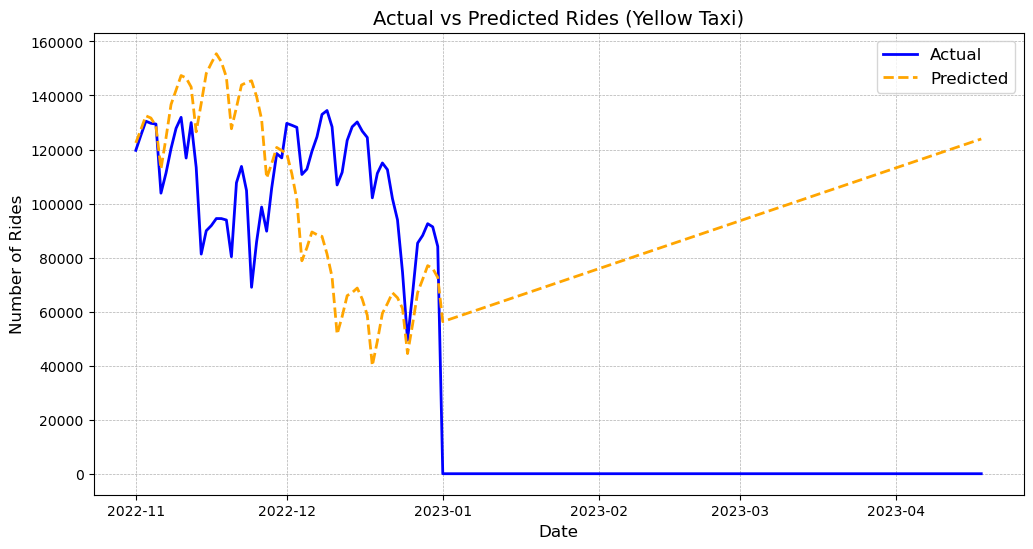

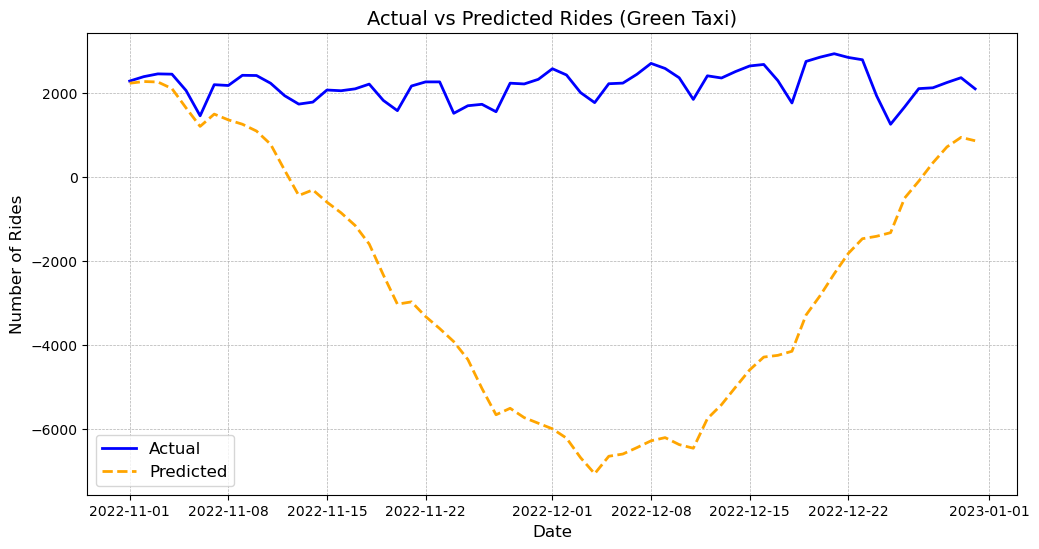

In [73]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values for yellow taxis with visualization principles
plt.figure(figsize=(12, 6))
plt.plot(aligned_yellow['ds'], aligned_yellow['y_true'], label='Actual', color='blue', linewidth=2)
plt.plot(aligned_yellow['ds'], aligned_yellow['y_pred'], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Rides (Yellow Taxi)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot the actual vs predicted values for green taxis with visualization principles
plt.figure(figsize=(12, 6))
plt.plot(aligned_green['ds'], aligned_green['y_true'], label='Actual', color='blue', linewidth=2)
plt.plot(aligned_green['ds'], aligned_green['y_pred'], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Rides (Green Taxi)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The plots show that the predicted values are not capturing the actual trends in the data at all. This indicates a significant issue with the model's predictions.

The only part where we have something reasonable is the first week of months where we have a good fit. 

We have tried different filtering options, no filtering optionts, tweaking different paramaters with no prevail. This prediction here is the closest we come to mathcing the historical data. 